In [1]:
import os

base_path = "/kaggle/input"
for root, dirs, files in os.walk(base_path):
    print(root)


/kaggle/input
/kaggle/input/dataset-caramble
/kaggle/input/dataset-caramble/Augmented
/kaggle/input/dataset-caramble/Augmented/Iron_Dediciency
/kaggle/input/dataset-caramble/Augmented/Fruit
/kaggle/input/dataset-caramble/Augmented/Leaf_Carl_Virus
/kaggle/input/dataset-caramble/Augmented/Healthy
/kaggle/input/dataset-caramble/Augmented/Algal_Leaf_Spot
/kaggle/input/dataset-caramble/Augmented/Insect_past
/kaggle/input/dataset-caramble/Augmented/Old


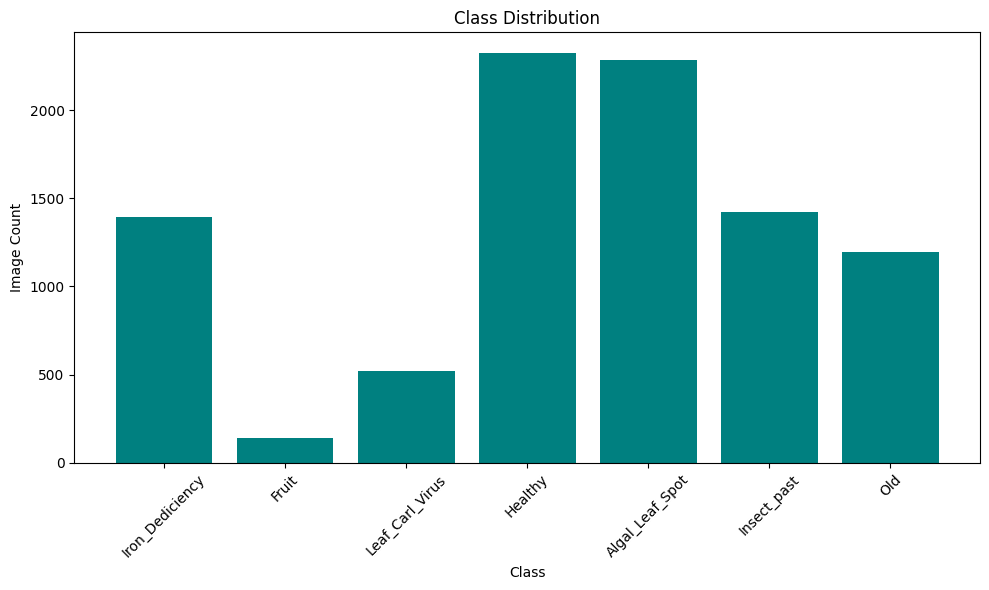

In [2]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Define dataset path
dataset_path = "/kaggle/input/dataset-caramble/Augmented"

# Get class names and image counts
class_counts = {}
class_paths = {}

for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        image_count = len([
            f for f in os.listdir(class_folder)
            if f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])
        class_counts[class_name] = image_count
        class_paths[class_name] = class_folder

# Plot class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='teal')
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 195MB/s]



Epoch [1/20] | Train Acc: 58.20% | Val Acc: 68.37%
Precision: 0.7450 | Recall: 0.6644 | F1-Score: 0.6783

Epoch [2/20] | Train Acc: 75.83% | Val Acc: 71.98%
Precision: 0.7910 | Recall: 0.6709 | F1-Score: 0.7056

Epoch [3/20] | Train Acc: 85.50% | Val Acc: 70.85%
Precision: 0.7818 | Recall: 0.6856 | F1-Score: 0.7112

Epoch [4/20] | Train Acc: 91.45% | Val Acc: 73.98%
Precision: 0.7671 | Recall: 0.7341 | F1-Score: 0.7473

Epoch [5/20] | Train Acc: 94.37% | Val Acc: 73.22%
Precision: 0.7852 | Recall: 0.6839 | F1-Score: 0.7190

Epoch [6/20] | Train Acc: 96.16% | Val Acc: 74.78%
Precision: 0.7931 | Recall: 0.7187 | F1-Score: 0.7439

Epoch [7/20] | Train Acc: 97.62% | Val Acc: 75.00%
Precision: 0.7880 | Recall: 0.7479 | F1-Score: 0.7604

Epoch [8/20] | Train Acc: 97.37% | Val Acc: 75.32%
Precision: 0.7874 | Recall: 0.7466 | F1-Score: 0.7594

Epoch [9/20] | Train Acc: 97.90% | Val Acc: 75.70%
Precision: 0.7840 | Recall: 0.7337 | F1-Score: 0.7530

Epoch [10/20] | Train Acc: 97.63% | Val Acc: 

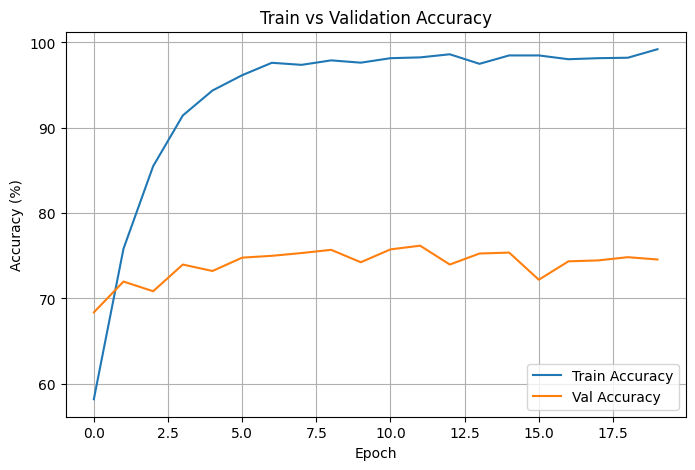

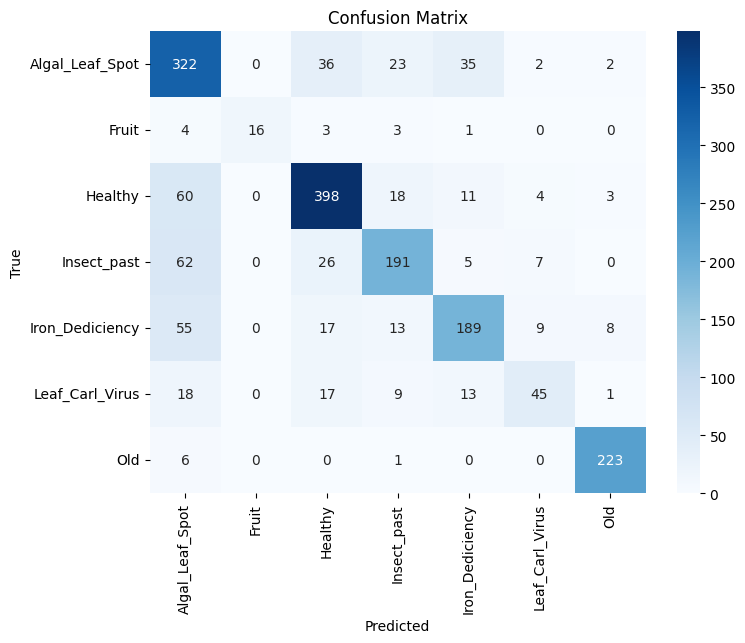


Classification Report:
                 precision    recall  f1-score   support

Algal_Leaf_Spot       0.61      0.77      0.68       420
          Fruit       1.00      0.59      0.74        27
        Healthy       0.80      0.81      0.80       494
    Insect_past       0.74      0.66      0.70       291
Iron_Dediciency       0.74      0.65      0.69       291
Leaf_Carl_Virus       0.67      0.44      0.53       103
            Old       0.94      0.97      0.96       230

       accuracy                           0.75      1856
      macro avg       0.79      0.70      0.73      1856
   weighted avg       0.75      0.75      0.74      1856



In [3]:
# ✅ Full VGG16 Pipeline for Star Fruit Disease Classification

import os
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset path
data_path = "/kaggle/input/dataset-caramble/Augmented"

# Transforms
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3),
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3),
])

# Load full dataset
dataset = datasets.ImageFolder(root=data_path, transform=train_transforms)
class_names = dataset.classes

# Split dataset
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
val_dataset.dataset.transform = val_transforms

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# Load VGG16 model
vgg16 = models.vgg16(pretrained=True)
for param in vgg16.features.parameters():
    param.requires_grad = False
vgg16.classifier[6] = nn.Linear(4096, len(class_names))
vgg16 = vgg16.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.parameters(), lr=0.0001)

# Training settings
num_epochs = 20
train_acc_list = []
val_acc_list = []

# Training loop
for epoch in range(num_epochs):
    vgg16.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = vgg16(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    train_acc_list.append(train_acc)

    # Validation
    vgg16.eval()
    val_correct = 0
    val_total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = vgg16(images)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_acc = 100 * val_correct / val_total
    val_acc_list.append(val_acc)
    precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

    print(f"\nEpoch [{epoch+1}/{num_epochs}] | Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")
    print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")

# Save model
torch.save(vgg16.state_dict(), "vgg16_starfruit.pth")

# Accuracy curve
plt.figure(figsize=(8, 5))
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(val_acc_list, label='Val Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Train vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))
